# 6.5 Clustering Analysis

### Contents
##### Import Libraries & Data and Prepare for Analysis
##### The Elbow Technique
##### kmeans Clustering

### Import Libraries & Data and Prepare for Analysis

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [7]:
path = r'C:\\Users\\sstorer\\OneDrive\\Achievement 6 Project'

In [8]:
# Import dataframe
df = pd.read_csv(os.path.join(path, '02 Datasets', 'Prepared Data', 'mental_health_dataset_cleaned.csv'), index_col = False)

In [9]:
df.shape

(6840, 13)

In [10]:
# Drop index column
df = df.drop('Unnamed: 0', axis=1)

In [11]:
df.head()

,Country,Year,Prevalence - Mental disorders (Percent),Prevalence - Schizophrenia (Percent),Prevalence - Bipolar disorder (Percent),Prevalence - Eating disorders (Percent),Prevalence - Anxiety disorders (Percent),Prevalence - Drug use disorders (Percent),Prevalence - Depressive disorders (Percent),Prevalence - Alcohol use disorders (Percent),DALYs - Mental disorders (Percent),Burden of Disease - Mental disorders
0,Afghanistan,1990,16.659229,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670,Low
1,Afghanistan,1991,16.765052,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281,Low
2,Afghanistan,1992,16.874469,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189,Low
3,Afghanistan,1993,16.990720,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779,Low
4,Afghanistan,1994,17.112730,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986,Low


In [12]:
# Remove categorical columns for clustering analysis

df1 = df.drop(['Country', 'Year', 'Burden of Disease - Mental disorders'], axis=1)

In [13]:
df1.shape

(6840, 9)

In [14]:
# Check dataframe for null values
df1.isnull().sum()

Prevalence - Mental disorders (Percent)         60
Prevalence - Schizophrenia (Percent)             0
Prevalence - Bipolar disorder (Percent)          0
Prevalence - Eating disorders (Percent)          0
Prevalence - Anxiety disorders (Percent)         0
Prevalence - Drug use disorders (Percent)        0
Prevalence - Depressive disorders (Percent)      0
Prevalence - Alcohol use disorders (Percent)     0
DALYs - Mental disorders (Percent)               0
dtype: int64

In [15]:
# Drop column with null values to continue with kmeans
df1 = df1.drop('Prevalence - Mental disorders (Percent)', axis=1)

### The Elbow Technique

In [17]:
num_cl = range(1, 20) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-59354.46755435504,
 -30535.213972082478,
 -22214.70650053036,
 -19319.50566859482,
 -17039.46473868509,
 -15303.241268275047,
 -14479.865644194828,
 -13657.784694502707,
 -12146.307603794521,
 -11934.39948311284,
 -11255.248776232665,
 -10390.214098850684,
 -9851.54465995117,
 -9605.234706896743,
 -9283.12153806565,
 -9067.125000894339,
 -8437.190293449603,
 -8288.331333238559,
 -8151.349120151816]

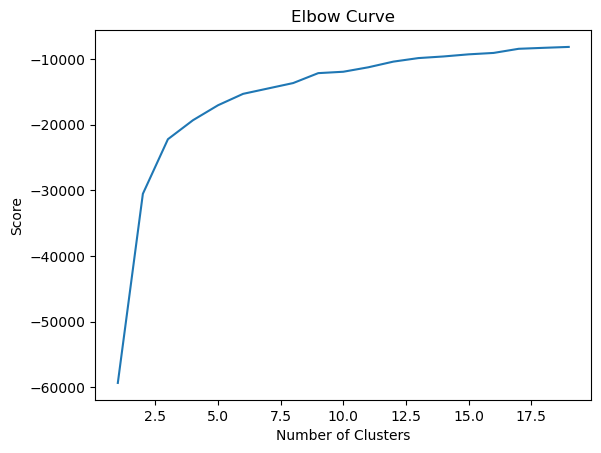

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I will chose 3 clusters for the kmeans algorithm, because the elbow curve begins to flatten out after about 3 clusters.

### kmeans Clustering

In [22]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [23]:
# Fit the k-means object to the data.

kmeans.fit(df1)

KMeans(n_clusters=3)

In [24]:
df1['clusters'] = kmeans.fit_predict(df1)

In [25]:
df1.head()

,Prevalence - Schizophrenia (Percent),Prevalence - Bipolar disorder (Percent),Prevalence - Eating disorders (Percent),Prevalence - Anxiety disorders (Percent),Prevalence - Drug use disorders (Percent),Prevalence - Depressive disorders (Percent),Prevalence - Alcohol use disorders (Percent),DALYs - Mental disorders (Percent),clusters
0,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670,1
1,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281,1
2,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189,1
3,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779,1
4,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986,1


In [26]:
# Check the value counts for the clusters
df1['clusters'].value_counts()

clusters
0    2940
1    2098
2    1802
Name: count, dtype: int64

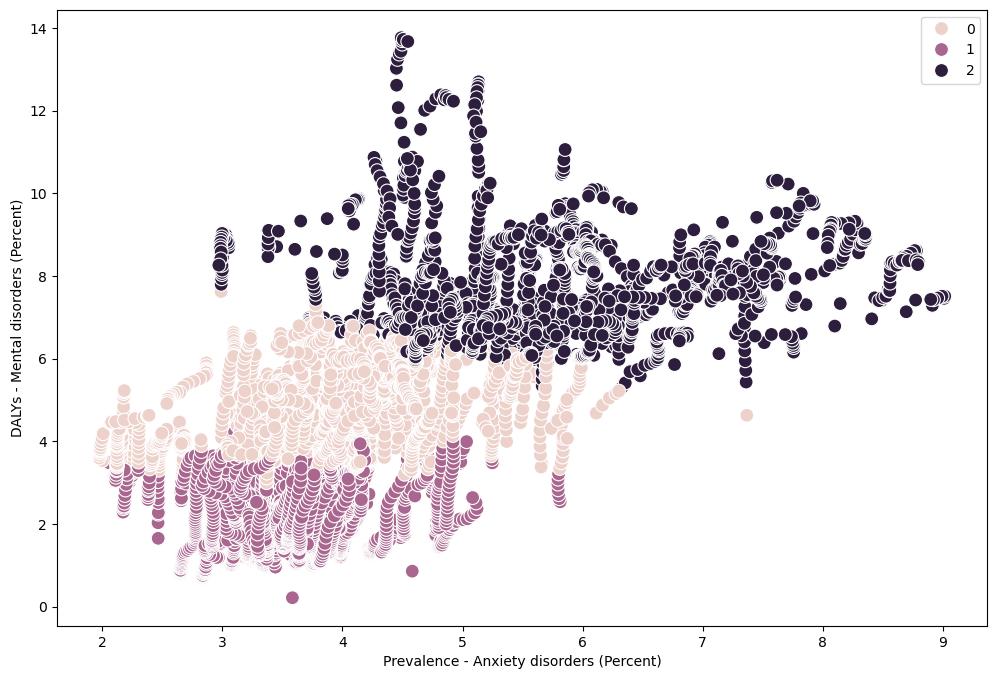

In [27]:
# Plot the clusters for Prevalence - Anxiety disorders & DALYs - Mental disorders 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Prevalence - Anxiety disorders (Percent)'], y=df['DALYs - Mental disorders (Percent)'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background
plt.xlabel('Prevalence - Anxiety disorders (Percent)') # Label x-axis.
plt.ylabel('DALYs - Mental disorders (Percent)') # Label y-axis
plt.show()

Cluster number 2 has the most values, and it shows very little points of Anxiety prevalence after about 6%. The cluser with the widest appearing range is cluster number 1, and it has the most values that are the highest for both anxiety prevalence and DALYs. Cluster 0 has the lowest prevalence for anxiety and the lowest DALYs values.

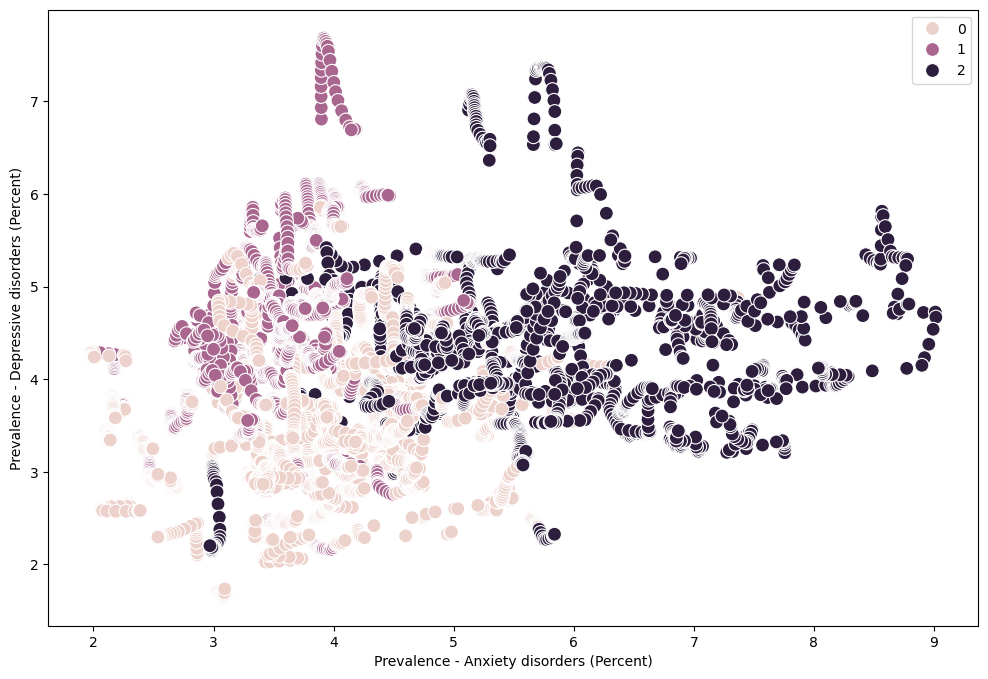

In [29]:
# Plot the clusters for Prevalence - Anxiety disorders & Prevalence - Depressive disorders 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Prevalence - Anxiety disorders (Percent)'], y=df['Prevalence - Depressive disorders (Percent)'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background
plt.xlabel('Prevalence - Anxiety disorders (Percent)') # Label x-axis.
plt.ylabel('Prevalence - Depressive disorders (Percent)') # Label y-axis
plt.show()

Anxiety and Depressive disorders co-occur frequently. Cluster number 1 shows this the most accurately, as it has the highest prevalences of both anxiety and depressive disorders. Cluster 0 has mostly low anxiety prevalence and higher depression prevbalence, and cluster number 2, which houses most of the data points in the dataset, has lower values for both anxiety and depressive disorders.

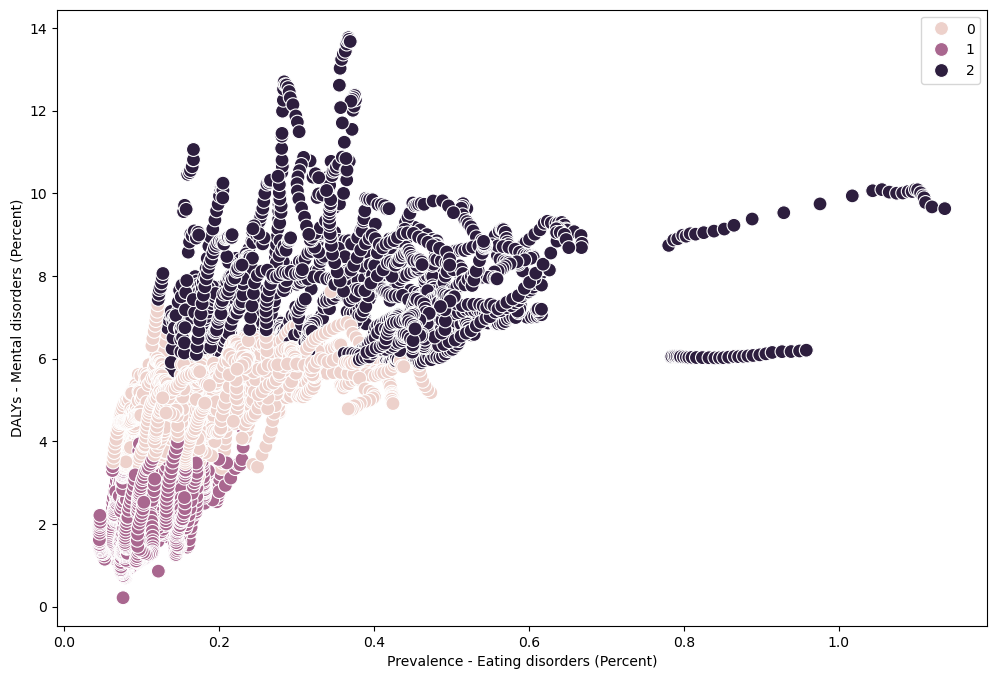

In [31]:
# Plot the clusters for Prevalence - Eating disorders & DALYs - Mental disorders 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Prevalence - Eating disorders (Percent)'], y=df['DALYs - Mental disorders (Percent)'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background
plt.xlabel('Prevalence - Eating disorders (Percent)') # Label x-axis.
plt.ylabel('DALYs - Mental disorders (Percent)') # Label y-axis
plt.show()

Cluster number 1 houses values that are higher in prevalence for eating disorders and higher in DALYs. Cluster 0 holds the lowest values for each variable, and cluster 2 is in the middle between both clusters. These clusters appear to make sense, as there is a strong relationship between the prevalence of eating disorders and DALYs. 

In [33]:
df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'pink'

In [34]:
# Calculate descriptive statistics for the clusters

df1.groupby('cluster').agg({'Prevalence - Schizophrenia (Percent)':['mean', 'median'], 
                         'Prevalence - Bipolar disorder (Percent)':['mean', 'median'], 
                         'Prevalence - Eating disorders (Percent)':['mean', 'median'],
                          'Prevalence - Anxiety disorders (Percent)':['mean', 'median'],
                          'Prevalence - Drug use disorders (Percent)':['mean', 'median'],
                          'Prevalence - Depressive disorders (Percent)':['mean', 'median'],
                          'Prevalence - Alcohol use disorders (Percent)':['mean', 'median'],
                          'DALYs - Mental disorders (Percent)':['mean', 'median']})

Prevalence - Schizophrenia (Percent)            \
                                            mean    median   
cluster                                                      
dark purple                             0.312896  0.298780   
pink                                    0.295903  0.297187   
purple                                  0.233265  0.219571   

            Prevalence - Bipolar disorder (Percent)            \
                                               mean    median   
cluster                                                         
dark purple                                0.939715  0.968993   
pink                                       0.618345  0.577865   
purple                                     0.523409  0.552768   

            Prevalence - Eating disorders (Percent)            \
                                               mean    median   
cluster                                                         
dark purple                                0.396844  0.409941   
pink                                       0.177041  0.157999   
purple                                     0.099165  0.093111   

            Prevalence - Anxiety disorders (Percent)            \
                                                mean    median   
cluster                                                          
dark purple                                 5.700902  5.556827   
pink                                        3.994374  4.060461   
purple                                      3.614768  3.603418   

            Prevalence - Drug use disorders (Percent)            \
                                                 mean    median   
cluster                                                           
dark purple                                  1.097963  0.993652   
pink                                         0.743126  0.717177   
purple                                       0.450030  0.392251   

            Prevalence - Depressive disorders (Percent)            \
                                                   mean    median   
cluster                                                             
dark purple                                    4.293923  4.250686   
pink                                           3.419358  3.309138   
purple                                         4.399670  4.439275   

            Prevalence - Alcohol use disorders (Percent)            \
                                                    mean    median   
cluster                                                              
dark purple                                     1.867992  1.959617   
pink                                            1.699040  1.611718   
purple                                          1.161936  1.103897   

            DALYs - Mental disorders (Percent)            
                                          mean    median  
cluster                                                   
dark purple                           7.768211  7.527098  
pink                                  4.849902  4.788683  
purple                                2.239520  2.194761

The purple values have the highest averages overall, with dark purple being second highest, and pink being the lowest averages. This makes sense based on the charts above and where the values are plotted.

These results could be helpful in grouping the data in future analylsis to better determine results.

In [63]:
# Export dataframe

df1.to_csv(os.path.join(path, '02 Datasets', 'Prepared Data', 'mental_health_dataset_cluster.csv'))